# Assignment 1

Name - Shweta Chandraprakash Bulchandani 

NUID - 002769540

# Abstarct



The goal was to construct a realistic model to precisely predict the next meningitis disease outbreak in Nigeria. It is generally believed that it’s impossible to precisely predict the next meningitis disease as it depends on various factors. For this dataset age and report year is the dependent variable and others are independent variables. First, major factors affecting the diseases should be selected. Then, a model for disease prediction should be established from linear regression. That should be applied to the Meningitis dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

# Information about the Dataset


What is our ultimate aim with this notebook?

Our ultimate aim is to build a machine learning model that can predict if the person will be afflicted with meningitis disease based on certain parameters. Before we create a model we need to do some data cleaning, feature selection and exploratory data analysis of the kaggle dataset.

**Kaggle Dataset Link**: https://www.kaggle.com/datasets/eiodelami/disease-outbreaks-in-nigeria-datasets



# Installing Dependencies

In [1]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 5.3 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3709978a1f32b7cb466439d0c949fe230f774c8943bbde3cbd5a25851cb240c6
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

# Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

#loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

#importing all the important libraries
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import skew, norm
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

pd.set_option('display.max_columns', None)

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy
from sklearn.impute import KNNImputer


import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

#%%capture
#this library can be used for validation as well as visualization of data 
#!pip install -q tensorflow_data_validation[visualization]

# Reading and Studying the data

In [3]:
#Reading the ablone dataset
data = pd.read_csv("https://raw.githubusercontent.com/ShwetaBulchandani/DataScienceEngineeringMethods_002769540/main/meningitis_dataset.csv")

In [4]:
#Viewing data in the file 
data.head()

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,age_str,date_of_birth,child_group,adult_group,disease,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,0,2018-05-15,2018,32,32 years,1986-01-17,0,1,Cholera,1,0,0,0,0,0,0,0,0,0,null serotype,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,0,2017-02-28,2017,32,32 years,1985-09-01,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,1,2012-03-02,2012,24,24 years,1988-05-01,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,0,2010-05-21,2010,63,63 years,1947-05-24,0,1,Measles,0,0,1,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,1,2017-08-28,2017,9,9 years,2008-01-07,1,0,Rubella Mars,0,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1


In [5]:
data.drop(columns = ['id','surname','firstname','middlename','gender','settlement','disease','serotype','health_status','report_outcome', 'date_of_birth', 'report_date'], inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   gender_male                 284484 non-null  int64 
 1   gender_female               284484 non-null  int64 
 2   state                       284484 non-null  object
 3   rural_settlement            284484 non-null  int64 
 4   urban_settlement            284484 non-null  int64 
 5   report_year                 284484 non-null  int64 
 6   age                         284484 non-null  int64 
 7   age_str                     284484 non-null  object
 8   child_group                 284484 non-null  int64 
 9   adult_group                 284484 non-null  int64 
 10  cholera                     284484 non-null  int64 
 11  diarrhoea                   284484 non-null  int64 
 12  measles                     284484 non-null  int64 
 13  viral_haemmorrhaphic_fever  2

# Checking Nulls in Dataset

In [7]:
data.isnull().sum()

gender_male                   0
gender_female                 0
state                         0
rural_settlement              0
urban_settlement              0
report_year                   0
age                           0
age_str                       0
child_group                   0
adult_group                   0
cholera                       0
diarrhoea                     0
measles                       0
viral_haemmorrhaphic_fever    0
meningitis                    0
ebola                         0
marburg_virus                 0
yellow_fever                  0
rubella_mars                  0
malaria                       0
NmA                           0
NmC                           0
NmW                           0
alive                         0
dead                          0
unconfirmed                   0
confirmed                     0
null_serotype                 0
dtype: int64

For this dataset there is no missing value.

In [8]:
month_index = data[data['age_str'].str.contains('months')].index

In [9]:
data.loc[month_index,'age'] = 0

In [10]:
data.drop(columns = ['age_str'], inplace = True)

# Checking Distribution of Variables

For linear regression all the variables must follow a normal distribution. So to check the distribution following code should be computed.

<Figure size 576x360 with 0 Axes>

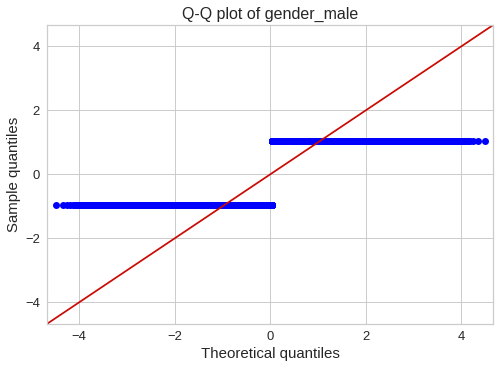

<Figure size 576x360 with 0 Axes>

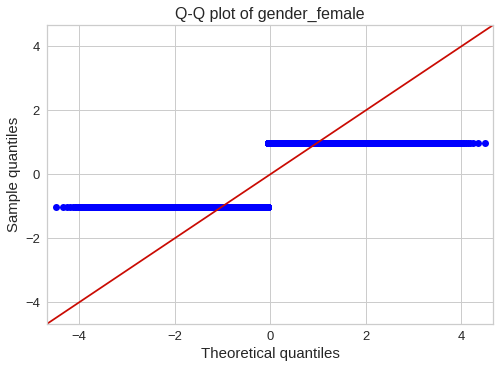

<Figure size 576x360 with 0 Axes>

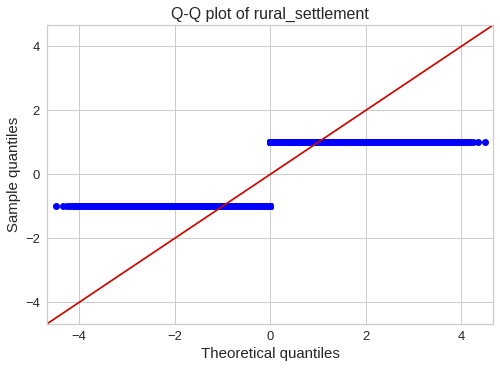

<Figure size 576x360 with 0 Axes>

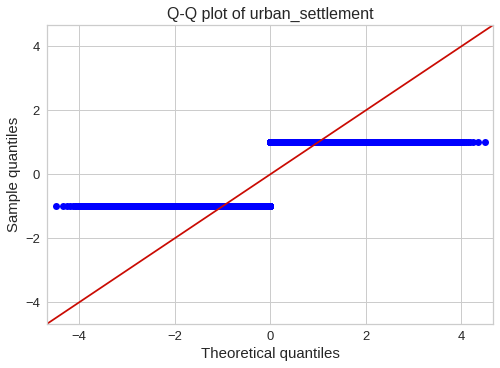

<Figure size 576x360 with 0 Axes>

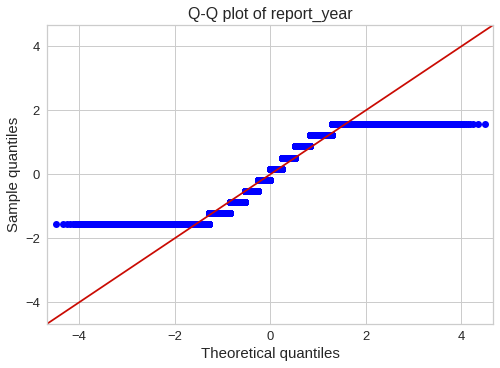

<Figure size 576x360 with 0 Axes>

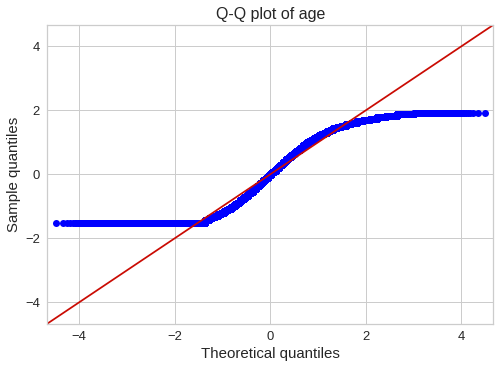

<Figure size 576x360 with 0 Axes>

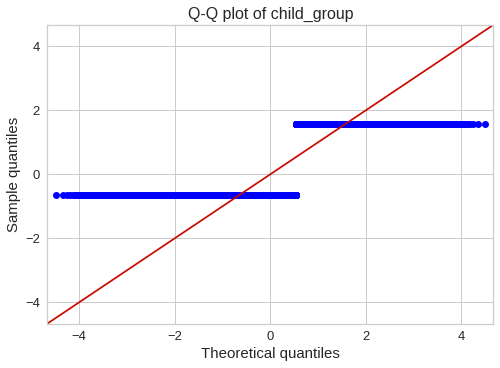

<Figure size 576x360 with 0 Axes>

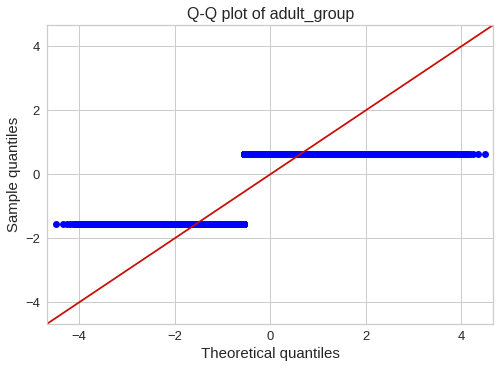

<Figure size 576x360 with 0 Axes>

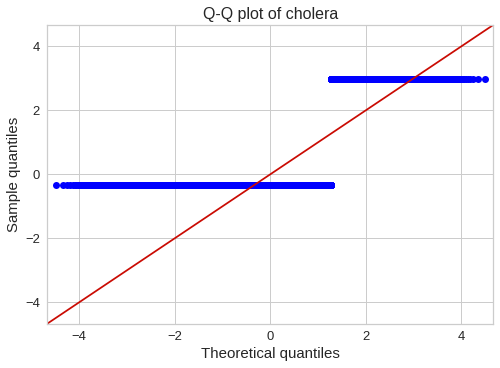

<Figure size 576x360 with 0 Axes>

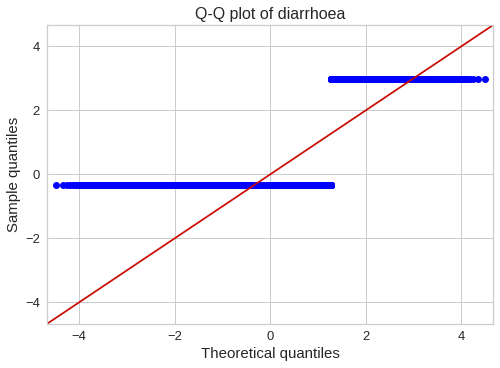

<Figure size 576x360 with 0 Axes>

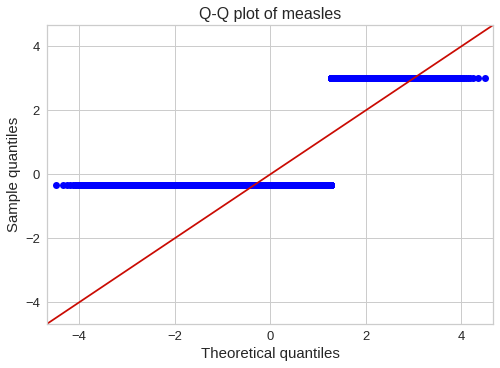

<Figure size 576x360 with 0 Axes>

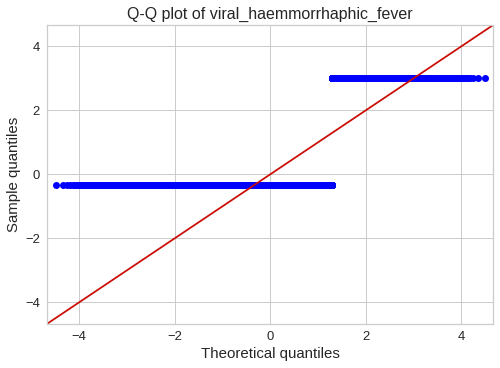

<Figure size 576x360 with 0 Axes>

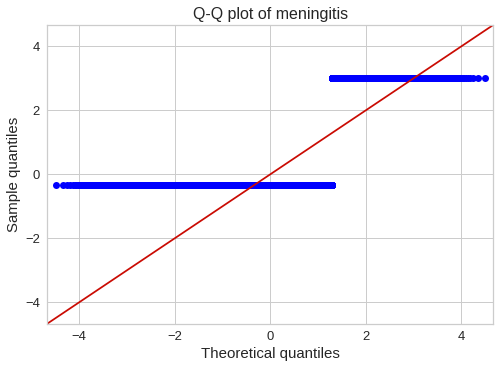

<Figure size 576x360 with 0 Axes>

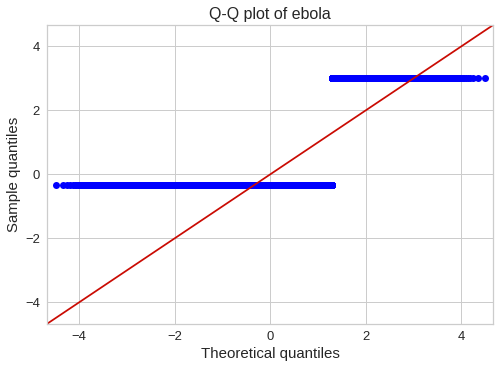

<Figure size 576x360 with 0 Axes>

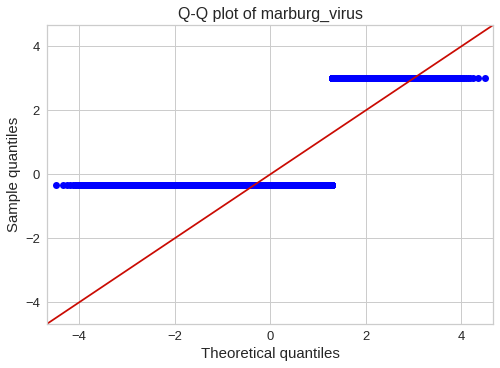

<Figure size 576x360 with 0 Axes>

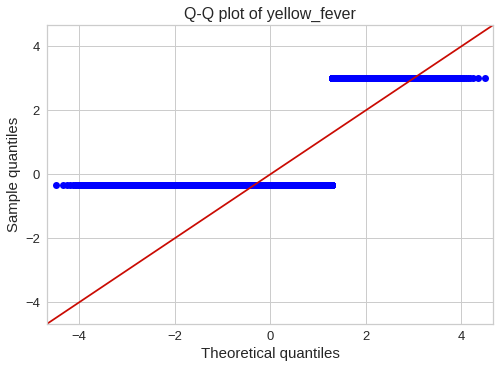

<Figure size 576x360 with 0 Axes>

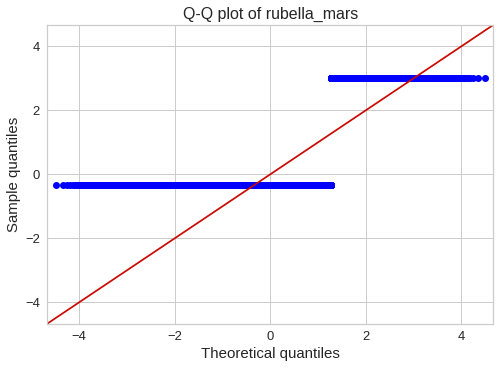

<Figure size 576x360 with 0 Axes>

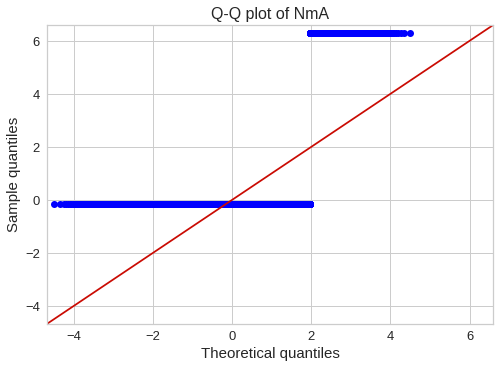

<Figure size 576x360 with 0 Axes>

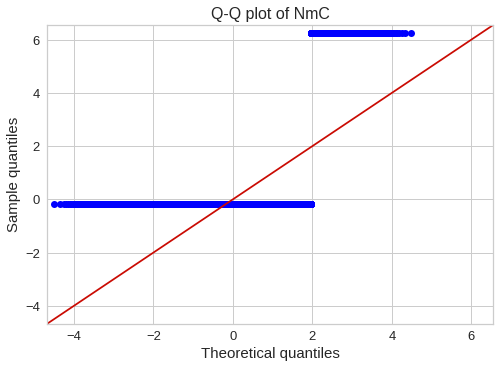

<Figure size 576x360 with 0 Axes>

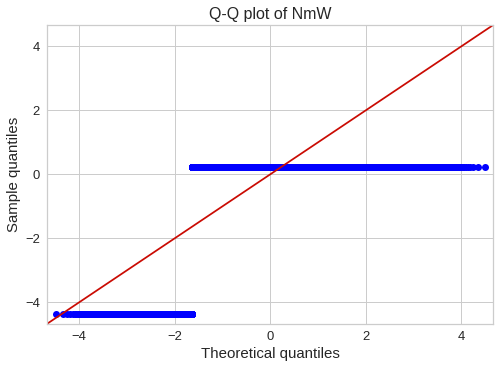

<Figure size 576x360 with 0 Axes>

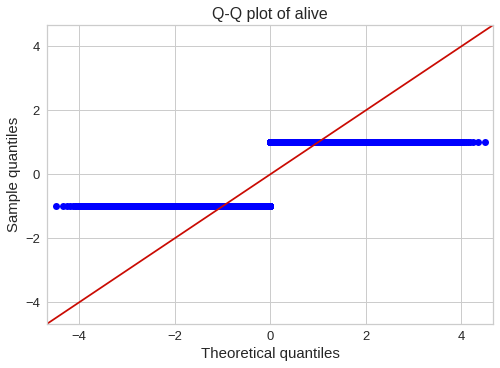

<Figure size 576x360 with 0 Axes>

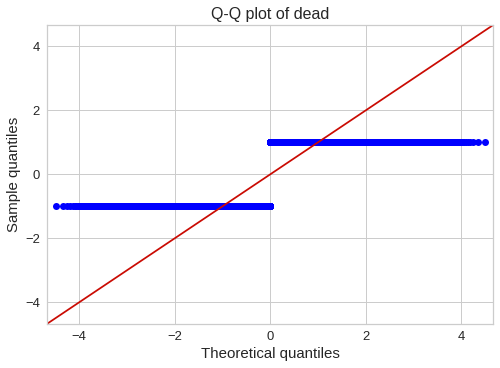

<Figure size 576x360 with 0 Axes>

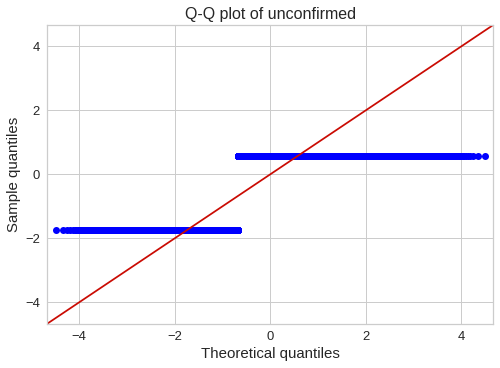

<Figure size 576x360 with 0 Axes>

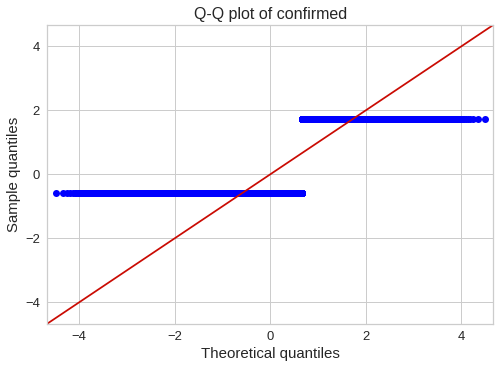

<Figure size 576x360 with 0 Axes>

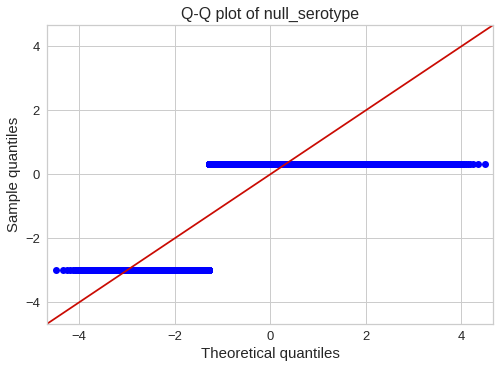

In [11]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['gender_male', 'gender_female', 'rural_settlement', 'urban_settlement', 'report_year', 'age' , 'child_group', 'adult_group', 'cholera'	,'diarrhoea',	'measles',	'viral_haemmorrhaphic_fever',	'meningitis',	'ebola',	'marburg_virus',	'yellow_fever',	'rubella_mars',	'NmA',	'NmC',	'NmW',	'alive',	'dead',	'unconfirmed',	'confirmed'	, 'null_serotype']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

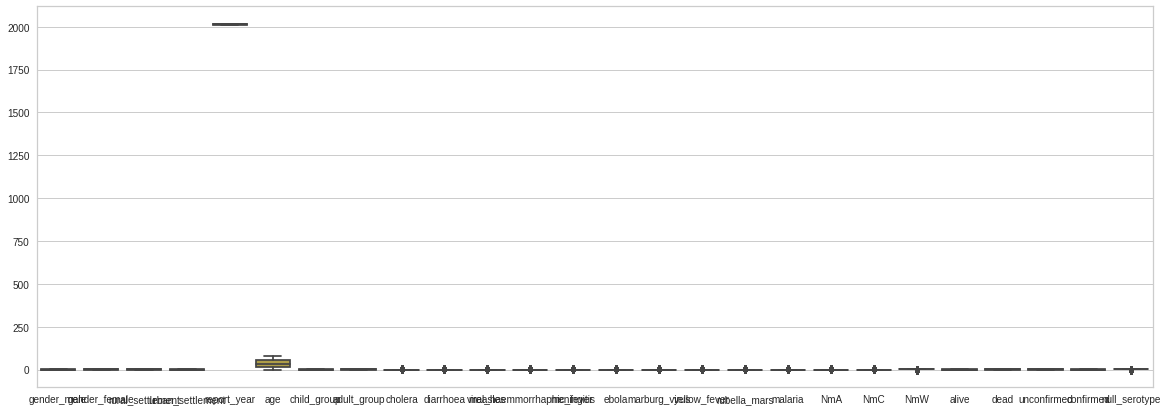

In [12]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

For the given dataset I plotted q-q plot and bell-curve for some of the independent variables. It is observed that all of them roughly follow normal distribution.

Other variables like 'Age_Str', 'Disease', 'Report Outcome' and 'State' are categorical variables and hence have not plotted their distribution.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   gender_male                 284484 non-null  int64 
 1   gender_female               284484 non-null  int64 
 2   state                       284484 non-null  object
 3   rural_settlement            284484 non-null  int64 
 4   urban_settlement            284484 non-null  int64 
 5   report_year                 284484 non-null  int64 
 6   age                         284484 non-null  int64 
 7   child_group                 284484 non-null  int64 
 8   adult_group                 284484 non-null  int64 
 9   cholera                     284484 non-null  int64 
 10  diarrhoea                   284484 non-null  int64 
 11  measles                     284484 non-null  int64 
 12  viral_haemmorrhaphic_fever  284484 non-null  int64 
 13  meningitis                  2

In [14]:
data['state'].unique()

array(['Rivers', 'Ebonyi', 'Ogun', 'Ondo', 'Oyo', 'Kaduna', 'Taraba',
       'Katsina', 'Osun', 'Niger', 'Cross River', 'Adamawa', 'Nasarawa',
       'Imo', 'Abia', 'Yobe', 'Delta', 'Jigawa', 'Borno', 'Kwara',
       'Bayelsa', 'Federal Capital Territory', 'Kogi', 'Gombe', 'Sokoto',
       'Anambra', 'Kebbi', 'Lagos', 'Plateau', 'Zamfara', 'Edo', 'Ekiti',
       'Enugu', 'Bauchi', 'Kano', 'Benue', 'Akwa Ibom'], dtype=object)

In [15]:
#Creating binary vaiables  

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [16]:
# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Encode the columns using the fit_transform method
encoded_data = encoder.fit_transform(data[['state']])

# Convert the encoded data to a dataframe
df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['state']))

# Print the encoded dataframe
print(df)

        state_Abia  state_Adamawa  state_Akwa Ibom  state_Anambra  \
0              0.0            0.0              0.0            0.0   
1              0.0            0.0              0.0            0.0   
2              0.0            0.0              0.0            0.0   
3              0.0            0.0              0.0            0.0   
4              0.0            0.0              0.0            0.0   
...            ...            ...              ...            ...   
284479         0.0            0.0              0.0            0.0   
284480         0.0            0.0              0.0            0.0   
284481         0.0            0.0              0.0            0.0   
284482         0.0            0.0              0.0            0.0   
284483         0.0            0.0              0.0            0.0   

        state_Bauchi  state_Bayelsa  state_Benue  state_Borno  \
0                0.0            0.0          0.0          0.0   
1                0.0            0.0      

In [17]:
df.head()

,state_Abia,state_Adamawa,state_Akwa Ibom,state_Anambra,state_Bauchi,state_Bayelsa,state_Benue,state_Borno,state_Cross River,state_Delta,state_Ebonyi,state_Edo,state_Ekiti,state_Enugu,state_Federal Capital Territory,state_Gombe,state_Imo,state_Jigawa,state_Kaduna,state_Kano,state_Katsina,state_Kebbi,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Ondo,state_Osun,state_Oyo,state_Plateau,state_Rivers,state_Sokoto,state_Taraba,state_Yobe,state_Zamfara
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data=pd.concat([data, df], axis=1)

In [19]:
data.drop(columns = ['state'], inplace = True)

# Analysing Relationship between all variables

The correlation matrix is simply a table of correlations.

Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation. It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

This is one of the methhod that will tell us which independent variables are useful to predict a target variable. Other than correlation matrix other methods which help us to determine independent variable importance are pairplot against the target variable and calculating p-value.

In [20]:
#checking the correlation between all the features in the data
data.corr()

,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype,state_Abia,state_Adamawa,state_Akwa Ibom,state_Anambra,state_Bauchi,state_Bayelsa,state_Benue,state_Borno,state_Cross River,state_Delta,state_Ebonyi,state_Edo,state_Ekiti,state_Enugu,state_Federal Capital Territory,state_Gombe,state_Imo,state_Jigawa,state_Kaduna,state_Kano,state_Katsina,state_Kebbi,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Ondo,state_Osun,state_Oyo,state_Plateau,state_Rivers,state_Sokoto,state_Taraba,state_Yobe,state_Zamfara
gender_male,1.000000,-1.000000,-0.000926,0.000926,0.000921,0.001947,-0.000692,0.000692,0.002971,-0.001129,-0.003589,-0.001486,-0.000200,0.004091,0.000086,-0.001392,-2.667015e-03,0.003326,-0.000342,-0.003012,0.002424,0.002106,-0.002106,0.001794,-0.001794,0.000200,-0.000321,0.002774,-0.000773,-0.001502,0.001652,0.000274,-0.001705,-0.000798,-0.000744,0.002768,0.003522,0.002501,-0.002333,-0.000799,0.001390,-0.003265,-0.000556,0.002263,-0.001681,0.001734,-0.001315,0.001653,0.002280,0.001022,0.001692,-0.001660,0.000028,0.000606,-0.003223,-0.002744,-0.001966,0.000828,0.001354,-0.000933,-0.002158,-0.001848,0.002000
gender_female,-1.000000,1.000000,0.000926,-0.000926,-0.000921,-0.001947,0.000692,-0.000692,-0.002971,0.001129,0.003589,0.001486,0.000200,-0.004091,-0.000086,0.001392,2.667015e-03,-0.003326,0.000342,0.003012,-0.002424,-0.002106,0.002106,-0.001794,0.001794,-0.000200,0.000321,-0.002774,0.000773,0.001502,-0.001652,-0.000274,0.001705,0.000798,0.000744,-0.002768,-0.003522,-0.002501,0.002333,0.000799,-0.001390,0.003265,0.000556,-0.002263,0.001681,-0.001734,0.001315,-0.001653,-0.002280,-0.001022,-0.001692,0.001660,-0.000028,-0.000606,0.003223,0.002744,0.001966,-0.000828,-0.001354,0.000933,0.002158,0.001848,-0.002000
rural_settlement,-0.000926,0.000926,1.000000,-1.000000,-0.002654,0.002356,-0.001912,0.001912,-0.000462,-0.000590,-0.000202,-0.001232,-0.000376,0.000934,-0.000658,0.001663,3.166132e-03,-0.002240,0.001451,0.000808,-0.001632,-0.003627,0.003627,0.000355,-0.000355,0.000376,-0.000008,0.001141,-0.001528,0.002221,-0.000962,0.002915,0.001303,-0.000198,0.002651,0.002574,0.000940,-0.002772,0.003037,-0.001632,-0.000701,-0.001483,-0.000616,0.000100,-0.001716,0.001641,-0.001791,-0.001543,-0.002721,-0.000291,-0.000006,0.003775,-0.000251,-0.001179,0.002090,0.000358,0.000358,0.002143,-0.000766,-0.002609,-0.000067,-0.003572,-0.000853
urban_settlement,0.000926,-0.000926,-1.000000,1.000000,0.002654,-0.002356,0.001912,-0.001912,0.000462,0.000590,0.000202,0.001232,0.000376,-0.000934,0.000658,-0.001663,-3.166132e-03,0.002240,-0.001451,-0.000808,0.001632,0.003627,-0.003627,-0.000355,0.000355,-0.000376,0.000008,-0.001141,0.001528,-0.002221,0.000962,-0.002915,-0.001303,0.000198,-0.002651,-0.002574,-0.000940,0.002772,-0.003037,0.001632,0.000701,0.001483,0.000616,-0.000100,0.001716,-0.001641,0.001791,0.001543,0.002721,0.000291,0.000006,-0.003775,0.000251,0.001179,-0.002090,-0.000358,-0.000358,-0.002143,0.000766,0.002609,0.000067,0.003572,0.000853
report_year,0.000921,-0.000921,-0.002654,0.002654,1.000000,0.112598,-0.075731,0.075731,-0.001030,0.000760,0.002049,-0.001962,-0.000543,-0.000343,-0.001690,0.000865,4.866220e-07,0.001887,0.001002,-0.000870,-0.000116,0.000397,-0.000397,0.000288,-0.000288,0.000543,-0.001972,0.000326,-0.000312,-0.000150,0.001752,-0.002217,0.002199,0.001625,0.000166,0.000689,-0.002726,-0.002343,0.002752,0.002389,-0.002399,0.002033,-0.001183,-0.003083,-0.000639,0.000245,0.000129,0.000300,0.006384,-0.003795,0.001276,0.000317,0.001486,0.000323,-0.000679,0.001379,0.000332,-0.000685,-0.003609,-0.001716,-0.003101,0.001841,0.002677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

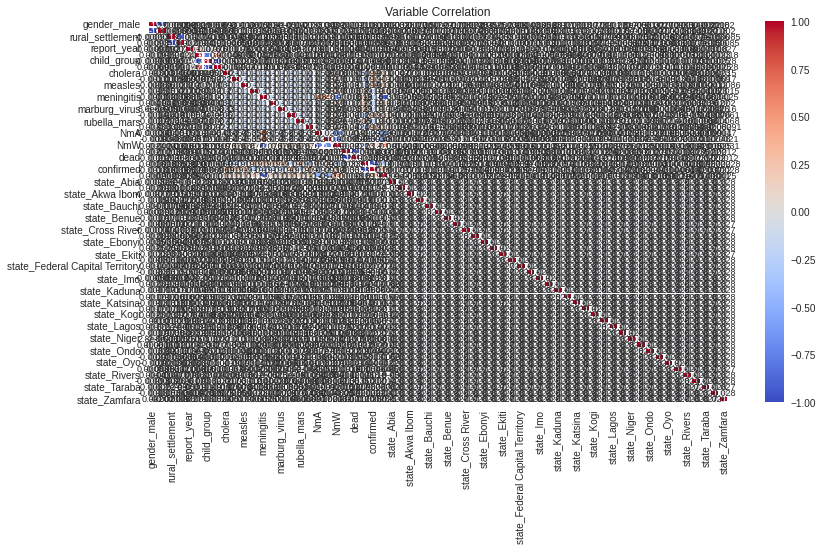

In [21]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Observations:

It is very clear from the heatmap that most of the variables are not dependent on each other

Degree of collinearity is significantly less that 0.1 for most variables



From the correlation matrix and the plots we can determine which variables help the most in predicting the target variable. From the matrix we can determine the same by checking which variables value is close to 1. 

From the plot as well as the matrix it can be observed that multicollinearity exists between independent variables.

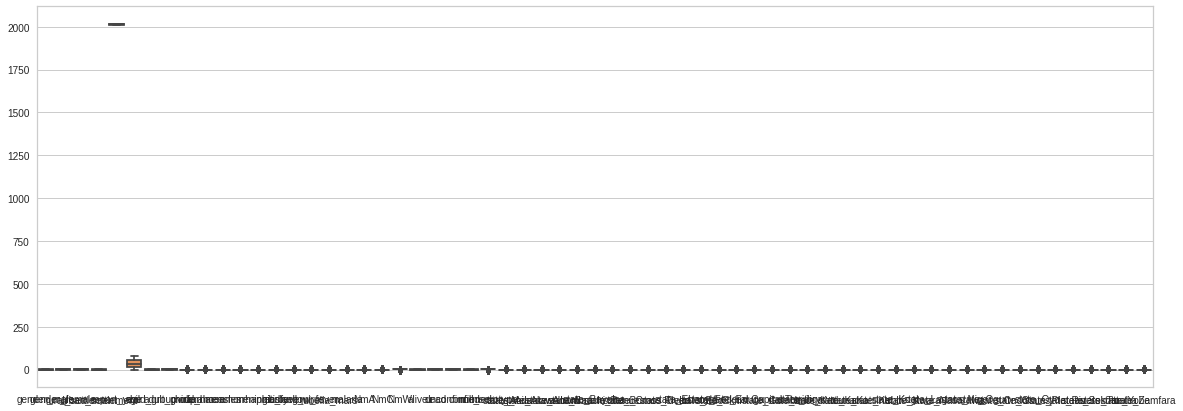

In [22]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

In [23]:
import sklearn.impute 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
x = imputer.fit_transform(data)
data = pd.DataFrame(x, columns=data.columns, index=data.index)


In [24]:
#Checking null values for each colum after imputing
def null_value_in_data(data):
  print(data.isnull().sum())
null_value_in_data(data)

gender_male         0
gender_female       0
rural_settlement    0
urban_settlement    0
report_year         0
                   ..
state_Rivers        0
state_Sokoto        0
state_Taraba        0
state_Yobe          0
state_Zamfara       0
Length: 63, dtype: int64


# Removing 1%, 5%, and 10% of data randomly and imputing the values back

In [25]:
#Removing 1% data from dataframe

df_train_per1 = data[['age']];
col_list = ['age']
for col in col_list:
    df_train_per1.loc[df_train_per1.sample(frac=0.01).index, col] = pd.np.nan

# Removing 5% data from dataframe

df_train_per5 = data[['age']];
col_list = ['age']
for col in col_list:
    df_train_per5.loc[df_train_per5.sample(frac=0.05).index, col] = pd.np.nan

# Removing 10% data from dataframe

df_train_per10 = data[['age']];
col_list = ['age']
for col in col_list:
    df_train_per10.loc[df_train_per10.sample(frac=0.10).index, col] = pd.np.nan

In [26]:
# Checking null null values after removing data from data set

print("One percent missing value: ", "\n", df_train_per1.isnull().sum())
print("")
print("Five  percent missing value: ", "\n", df_train_per5.isnull().sum())
print("")
print("Ten percent missing value: ", "\n", df_train_per10.isnull().sum())
print("")

One percent missing value:  
 age    2845
dtype: int64

Five  percent missing value:  
 age    14224
dtype: int64

Ten percent missing value:  
 age    28448
dtype: int64



In [27]:
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import missingno
from sklearn.linear_model import LogisticRegression
from seaborn import load_dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
import seaborn as sns

In [28]:
## KNN Imputation Method

# KNN Imputer for 1%
knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(df_train_per1))
#Rounding them because these are categorical features

df_train_knn_impute_1 = pd.DataFrame(X, columns = df_train_per1.columns)

# KNN Imputer for 5%
knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(df_train_per5))
#Rounding them because these are categorical features

df_train_knn_impute_5 = pd.DataFrame(X, columns = df_train_per5.columns)

# KNN Imputer for 10%
knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(df_train_per10))
#Rounding them because these are categorical features

df_train_knn_impute_10 = pd.DataFrame(X, columns = df_train_per10.columns)

In [29]:
# Checking data set after imputation

df_train_knn_impute_1.isnull().sum()
df_train_knn_impute_5.isnull().sum()
df_train_knn_impute_10.isnull().sum()

age    0
dtype: int64

In [30]:
# MICE Imputation Method

In [31]:
# Checking null values in data

print("One percent missing data" , '\n', df_train_per1.isnull().sum())
print ("")

print("Five percent missing data" , '\n', df_train_per5.isnull().sum())
print ("")

print("Ten percent missing data" , '\n', df_train_per10.isnull().sum())
print ("")

One percent missing data 
 age    2845
dtype: int64

Five percent missing data 
 age    14224
dtype: int64

Ten percent missing data 
 age    28448
dtype: int64



In [32]:
#  Using MICE Impute method

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
df_train_mice_per1 = imputer.fit_transform(df_train_per1)
print(df_train_mice_per1)

imputer = IterativeImputer(max_iter=10, random_state=0)
df_train_mice_per5 = imputer.fit_transform(df_train_per5)
print(df_train_mice_per5)

imputer = IterativeImputer(max_iter=10, random_state=0)
df_train_mice_per10 = imputer.fit_transform(df_train_per10)
print(df_train_mice_per10)

[[32.]
 [32.]
 [24.]
 ...
 [33.]
 [18.]
 [ 0.]]
[[32.]
 [32.]
 [24.]
 ...
 [33.]
 [18.]
 [ 0.]]
[[32.       ]
 [32.       ]
 [24.       ]
 ...
 [33.       ]
 [18.       ]
 [34.3639371]]


In [33]:
# Storing data in dataframe
df_train_mice_per1 = pd.DataFrame(df_train_mice_per1, columns= ["age"])
df_train_mice_per5 = pd.DataFrame(df_train_mice_per1, columns= ["age"])
df_train_mice_per10 = pd.DataFrame(df_train_mice_per1, columns= ["age"])


In [34]:
# Checking data after MICE imputation

df_train_mice_per1.isnull().sum()
df_train_mice_per5.isnull().sum()
df_train_mice_per10.isnull().sum()

age    0
dtype: int64

In [35]:
# Median Impute

In [36]:
# Checking null data in dataset

print("One percent missing data" , '\n', df_train_per1.isnull().sum())
print ("")

print("Five percent missing data" , '\n', df_train_per5.isnull().sum())
print ("")

print("Ten percent missing data" , '\n', df_train_per10.isnull().sum())
print ("")

One percent missing data 
 age    2845
dtype: int64

Five percent missing data 
 age    14224
dtype: int64

Ten percent missing data 
 age    28448
dtype: int64



In [37]:
# Using Median Impute Method to impute the data

imputer = SimpleImputer(strategy='median')
df_train_median_per1 = imputer.fit_transform(df_train_per1)
#print(df_train_median_per1)
df_train_median_per1 = pd.DataFrame(df_train_median_per1, columns= ["age"])
print("One percent missing data" , '\n', df_train_median_per1.isnull().sum())
print ("")


imputer = SimpleImputer(strategy='median')
df_train_median_per5 = imputer.fit_transform(df_train_per5)
#print(df_train_median_per5)
df_train_median_per5 = pd.DataFrame(df_train_median_per5, columns= ["age"])
print("Five percent missing data", '\n', df_train_median_per5.isnull().sum())
print ("")

imputer = SimpleImputer(strategy='median')
df_train_median_per10 = imputer.fit_transform(df_train_per10)
#print(df_train_median_per10)
df_train_median_per10 = pd.DataFrame(df_train_median_per10, columns= ["age"])
print("Ten percent missing data" , '\n', df_train_median_per10.isnull().sum())
print ("")

One percent missing data 
 age    0
dtype: int64

Five percent missing data 
 age    0
dtype: int64

Ten percent missing data 
 age    0
dtype: int64



In [38]:
# Importing libraries to calculated errors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [39]:
df_train_new1= pd.DataFrame(data, columns= ["age"])

mse_value1=mean_squared_error(df_train_new1,df_train_median_per1)
mae_value1=mean_absolute_error(df_train_new1,df_train_median_per1)
r2_square_value1=r2_score(df_train_new1,df_train_median_per1)

mse_value5=mean_squared_error(df_train_new1,df_train_median_per5)
mae_value5=mean_absolute_error(df_train_new1,df_train_median_per5)
r2_square_value5=r2_score(df_train_new1,df_train_median_per5)

mse_value10=mean_squared_error(df_train_new1,df_train_median_per10)
mae_value10=mean_absolute_error(df_train_new1,df_train_median_per10)
r2_square_value10=r2_score(df_train_new1,df_train_median_per10)

print("Mean squared error for 1%:", mse_value1)
print("Mean absolute error for 1%:",mae_value1)
print("R squared value for 1%:",r2_square_value1)
print("")

print("Mean squared error for 1%:", mse_value5)
print("Mean absolute error for 1%:",mae_value5)
print("R squared value for 1%:",r2_square_value5)
print("")

print("Mean squared error for 1%:", mse_value10)
print("Mean absolute error for 1%:",mae_value10)
print("R squared value for 1%:",r2_square_value10)
print("")

Mean squared error for 1%: 5.1454879712040045
Mean absolute error for 1%: 0.1971604729967239
R squared value for 1%: 0.9900684618960404

Mean squared error for 1%: 25.7849509990017
Mean absolute error for 1%: 0.9838795854951421
R squared value for 1%: 0.9502313046326301

Mean squared error for 1%: 51.51394454521168
Mean absolute error for 1%: 1.967636141224111
R squared value for 1%: 0.9005706152654124



In [40]:
df_train_new2= pd.DataFrame(data, columns= ["age"])

mse_value1=mean_squared_error(df_train_new2,df_train_knn_impute_1)
mae_value1=mean_absolute_error(df_train_new2,df_train_knn_impute_1)
r2_square_value1=r2_score(df_train_new1,df_train_knn_impute_1)

mse_value5=mean_squared_error(df_train_new2,df_train_knn_impute_5)
mae_value5=mean_absolute_error(df_train_new2,df_train_knn_impute_5)
r2_square_value5=r2_score(df_train_new1,df_train_knn_impute_5)

mse_value10=mean_squared_error(df_train_new2,df_train_knn_impute_10)
mae_value10=mean_absolute_error(df_train_new2,df_train_knn_impute_10)
r2_square_value10=r2_score(df_train_new1,df_train_knn_impute_10)


print("Mean squared error for 1%:", mse_value1)
print("Mean absolute error for 1%:",mae_value1)
print("R squared value for 1%:",r2_square_value1)
print ("")

print("Mean squared error for 5%:", mse_value5)
print("Mean absolute error for 5%:",mae_value5)
print("R squared value for 5%:",r2_square_value5)
print ("")

print("Mean squared error for 10%:", mse_value10)
print("Mean absolute error for 10%:",mae_value10)
print("R squared value for 10%:",r2_square_value10)
print("")

Mean squared error for 1%: 5.1454879712040045
Mean absolute error for 1%: 0.1971604729967239
R squared value for 1%: 0.9900684618960404

Mean squared error for 5%: 25.7849509990017
Mean absolute error for 5%: 0.9838795854951421
R squared value for 5%: 0.9502313046326301

Mean squared error for 10%: 51.51394454521168
Mean absolute error for 10%: 1.967636141224111
R squared value for 10%: 0.9005706152654124



In [41]:
df_train_new3= pd.DataFrame(data, columns= ["age"])

mse_value1=mean_squared_error(df_train_new3,df_train_mice_per1)
mae_value1=mean_absolute_error(df_train_new3,df_train_mice_per1)
r2_square_value1=r2_score(df_train_new1,df_train_mice_per1)

mse_value1=mean_squared_error(df_train_new3,df_train_mice_per5)
mae_value5=mean_absolute_error(df_train_new3,df_train_mice_per5)
r2_square_value5=r2_score(df_train_new1,df_train_mice_per5)

mse_value1=mean_squared_error(df_train_new3,df_train_mice_per10)
mae_value10=mean_absolute_error(df_train_new3,df_train_mice_per10)
r2_square_value10=r2_score(df_train_new1,df_train_mice_per10)

print("Mean squared error for 1%:", mse_value1)
print("Mean absolute error for 1%:",mae_value1)
print("R squared value for 1%:",r2_square_value1)
print("")

print("Mean squared error for 5%:", mse_value5)
print("Mean absolute error for 5%:",mae_value5)
print("R squared value for 5%:",r2_square_value5)
print("")

print("Mean squared error for 10%:", mse_value10)
print("Mean absolute error for 10%:",mae_value10)
print("R squared value for 10%:",r2_square_value10)
print("")

Mean squared error for 1%: 5.149238489585657
Mean absolute error for 1%: 0.1973014147942305
R squared value for 1%: 0.9900612228515755

Mean squared error for 5%: 25.7849509990017
Mean absolute error for 5%: 0.1973014147942305
R squared value for 5%: 0.9900612228515755

Mean squared error for 10%: 51.51394454521168
Mean absolute error for 10%: 0.1973014147942305
R squared value for 10%: 0.9900612228515755



In [42]:
#Splitting datafram into test and train

In [43]:
data.head()

,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype,state_Abia,state_Adamawa,state_Akwa Ibom,state_Anambra,state_Bauchi,state_Bayelsa,state_Benue,state_Borno,state_Cross River,state_Delta,state_Ebonyi,state_Edo,state_Ekiti,state_Enugu,state_Federal Capital Territory,state_Gombe,state_Imo,state_Jigawa,state_Kaduna,state_Kano,state_Katsina,state_Kebbi,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Ondo,state_Osun,state_Oyo,state_Plateau,state_Rivers,state_Sokoto,state_Taraba,state_Yobe,state_Zamfara
0,0.0,1.0,1.0,0.0,2018.0,32.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,2017.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,2012.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,2010.0,63.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,2017.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
data_x = data

In [45]:
data_x = data_x.drop(columns = 'cholera')

In [46]:
data_x

,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype,state_Abia,state_Adamawa,state_Akwa Ibom,state_Anambra,state_Bauchi,state_Bayelsa,state_Benue,state_Borno,state_Cross River,state_Delta,state_Ebonyi,state_Edo,state_Ekiti,state_Enugu,state_Federal Capital Territory,state_Gombe,state_Imo,state_Jigawa,state_Kaduna,state_Kano,state_Katsina,state_Kebbi,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Ondo,state_Osun,state_Oyo,state_Plateau,state_Rivers,state_Sokoto,state_Taraba,state_Yobe,state_Zamfara
0,0.0,1.0,1.0,0.0,2018.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,2017.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,2012.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,2010.0,63.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,2017.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,0.0,1.0,1.0,0.0,2012.0,67.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284480,0.0,1.0,0.0,1.0,2009.0,64.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284481,0.0,1.0,1.0,0.0,2010.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284482,1.0,0.0,1.0,0.0,2016.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data_y = data.iloc[:,5]

In [48]:
data_y

0         32.0
1         32.0
2         24.0
3         63.0
4          9.0
          ... 
284479    67.0
284480    64.0
284481    33.0
284482    18.0
284483     0.0
Name: age, Length: 284484, dtype: float64

In [49]:
y=data_y

In [50]:
x=data_x.drop('age',axis=1)

In [51]:
from sklearn.model_selection import  train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [53]:
X_train

,gender_male,gender_female,rural_settlement,urban_settlement,report_year,child_group,adult_group,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype,state_Abia,state_Adamawa,state_Akwa Ibom,state_Anambra,state_Bauchi,state_Bayelsa,state_Benue,state_Borno,state_Cross River,state_Delta,state_Ebonyi,state_Edo,state_Ekiti,state_Enugu,state_Federal Capital Territory,state_Gombe,state_Imo,state_Jigawa,state_Kaduna,state_Kano,state_Katsina,state_Kebbi,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Ondo,state_Osun,state_Oyo,state_Plateau,state_Rivers,state_Sokoto,state_Taraba,state_Yobe,state_Zamfara
49560,1.0,0.0,0.0,1.0,2013.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
110902,1.0,0.0,0.0,1.0,2014.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28890,0.0,1.0,0.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122870,1.0,0.0,1.0,0.0,2010.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26755,0.0,1.0,0.0,1.0,2015.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,1.0,0.0,0.0,1.0,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117583,0.0,1.0,1.0,0.0,2010.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73349,0.0,1.0,1.0,0.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267336,1.0,0.0,0.0,1.0,2011.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X_test

,gender_male,gender_female,rural_settlement,urban_settlement,report_year,child_group,adult_group,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype,state_Abia,state_Adamawa,state_Akwa Ibom,state_Anambra,state_Bauchi,state_Bayelsa,state_Benue,state_Borno,state_Cross River,state_Delta,state_Ebonyi,state_Edo,state_Ekiti,state_Enugu,state_Federal Capital Territory,state_Gombe,state_Imo,state_Jigawa,state_Kaduna,state_Kano,state_Katsina,state_Kebbi,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Ondo,state_Osun,state_Oyo,state_Plateau,state_Rivers,state_Sokoto,state_Taraba,state_Yobe,state_Zamfara
87711,1.0,0.0,0.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
108358,0.0,1.0,1.0,0.0,2016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172594,0.0,1.0,0.0,1.0,2014.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241338,0.0,1.0,0.0,1.0,2009.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43058,0.0,1.0,1.0,0.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281059,0.0,1.0,1.0,0.0,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109110,1.0,0.0,1.0,0.0,2014.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18655,1.0,0.0,1.0,0.0,2013.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12559,0.0,1.0,1.0,0.0,2018.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
y_train

49560     59.0
110902    50.0
28890     51.0
122870    20.0
26755      0.0
          ... 
21440     48.0
117583     4.0
73349     27.0
267336    10.0
128037    34.0
Name: age, Length: 227587, dtype: float64

In [56]:
y_test

87711     53.0
108358    11.0
172594    20.0
241338    69.0
43058     25.0
          ... 
281059    16.0
109110    67.0
18655      9.0
12559     45.0
179067    18.0
Name: age, Length: 56897, dtype: float64

# Linear Regression

In [57]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [58]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 63 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   gender_male                      284484 non-null  float64
 1   gender_female                    284484 non-null  float64
 2   rural_settlement                 284484 non-null  float64
 3   urban_settlement                 284484 non-null  float64
 4   report_year                      284484 non-null  float64
 5   age                              284484 non-null  float64
 6   child_group                      284484 non-null  float64
 7   adult_group                      284484 non-null  float64
 8   cholera                          284484 non-null  float64
 9   diarrhoea                        284484 non-null  float64
 10  measles                          284484 non-null  float64
 11  viral_haemmorrhaphic_fever       284484 non-null  float64
 12  me

# Making Predictions

In [60]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error =',mse)

r2=r2_score(y_test,y_pred)
print('R2 score on testing set =',r2)

Mean Squared error = 200.77255268620885
R2 score on testing set = 0.6138294796322756


In [61]:
y_pred

array([47.91601562,  7.50976562, 45.859375  , ...,  6.72265625,
       47.5234375 , 44.92578125])

In [62]:
y_test

87711     53.0
108358    11.0
172594    20.0
241338    69.0
43058     25.0
          ... 
281059    16.0
109110    67.0
18655      9.0
12559     45.0
179067    18.0
Name: age, Length: 56897, dtype: float64

# Identifing Predictor Significance

In [63]:
#OLS

In [64]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data_y,data_x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.359e+33
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:32:09   Log-Likelihood:             8.3429e+06
No. Observations:              284484   AIC:                        -1.669e+07
Df Residuals:                  284428   BIC:                        -1.669e+07
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
gender_male                      2.438e-12   1.22e-14    200.080      0.000    2.41e-12    2.46e-12
gender_female                    2.444e-12   1.22e-14    200.595      0.000    2.42e-12    2.47e-12
rural_settlement                 2.425e-12   1.22e-14    199.030      0.000     2.4e-12    2.45e-12
urban_settlement                 2.439e-12   1.22e-14    200.187      0.000    2.42e-12    2.46e-12
report_year                      2.233e-15   2.92e-17     76.524      0.000    2.18e-15    2.29e-15
age                                 1.0000   5.88e-18    1.7e+17      0.000       1.000       1.000
child_group                      2.451e-12   1.22e-14    201.164      0.000    2.43e-12    2.48e-12
adult_group                      2.442e-12   1.22e-14    200.493      0.000    2.42e-12    2.47e-12
diarrhoea                        3.397e-15   3.72e-16      9.144      0.000    2.67e-15    4.13e-15
measles                          8.039e-15   3.72e-16     21.620      0.000    7.31e-15    8.77e-15
viral_haemmorrhaphic_fever      -2.382e-15    3.9e-16     -6.109      0.000   -3.15e-15   -1.62e-15
meningitis                       2.438e-12   1.22e-14    200.058      0.000    2.41e-12    2.46e-12
ebola                           -1.044e-14   3.91e-16    -26.718      0.000   -1.12e-14   -9.67e-15
marburg_virus                    2.441e-15    3.9e-16      6.261      0.000    1.68e-15     3.2e-15
yellow_fever                    -1.063e-14   3.72e-16    -28.580      0.000   -1.14e-14    -9.9e-15
rubella_mars                     7.657e-15   3.89e-16     19.660      0.000    6.89e-15    8.42e-15
malaria                         -9.444e-15   3.72e-16    -25.413      0.000   -1.02e-14   -8.72e-15
NmA                             -1.929e-11   4.44e-14   -434.220      0.000   -1.94e-11   -1.92e-11
NmC                             -1.928e-11   4.44e-14   -434.206      0.000   -1.94e-11   -1.92e-11
NmW                             -1.927e-11   4.44e-14   -434.006      0.000   -1.94e-11   -1.92e-11
alive                            2.431e-12   1.22e-14    199.519      0.000    2.41e-12    2.45e-12
dead                             2.424e-12   1.22e-14    198.951      0.000     2.4e-12    2.45e-12
unconfirmed                      2.436e-12   1.22e-14    199.982      0.000    2.41e-12    2.46e-12
confirmed                        2.446e-12   1.22e-14    200.757      0.000    2.42e-12    2.47e-12
null_serotype                    2.423e-12   1.22e-14    198.857      0.000     2.4e-12    2.45e-12
state_Abia                       1.317e-13   8.26e-16    159.542      0.000     1.3e-13    1.33e-13
state_Adamawa                      1.3e-13   8.27e-16    157.241      0.000    1.28e-13    1.32e-13
state_Akwa Ibom                  1.381e-13   8.28e-16    166.765      0.000    1.36

We will consider a significance value of 0.05 for determining the significance of our predictor variables which means if

p value is greater that 0.05 - feature is not significant for predicting the target variable

p value is less than 0.05 - feature is significant for predicting the target variable

From the boxpot of independent variable we can determine the range of value of each variable. From this it can be observed that the values of all variables are scattered. From this plot it is observed that 'Cholera’, ‘Diarrhoea’, ‘Measles', 'Viral Haemmorrhaphic Fever', 'Meningitis', 'Ebola', 'Marburg Virus', 'Yellow Fever', 'Rubella Mars', 'Malaria', 'NmA' and 'NmC' have outliers.



# Conclusion

For the linear regression model to perform better feature extraction is performed. From various methods like computing correlation matrix, calculating p-value and VIF all the unnecessary variables are identified and then dropped from the dataset. Further, the accuracy of the model was checked by keeping the outliers and then removing those. It was observed that by removing the outliers the accuracy increases. Furthermore, to learn about imputation methods randomly 1%, 5% and 10% data were dropped and then imputed by 3 different methods.

# Assignment Question and Answers

>  What are the data types? (Only numeric and categorical)

For the given dataset all the variables are converted to numerical and categorical type. These are most preferable types as the model works best for those data types. For this dataset the categorical variables are: Surname, FirstName, MiddleName, Gender, State, Settlement, Age_Str,
Disease, Health Status and Report Outcome. All the remaining variables for this dataset are numerical like 'Report Year' and 'Age'.


> Are there missing values?

There are no missing values for this dataset.


> What are the likely distributions of the numeric variables?

Numeric variables for this dataset are 'gender_male', 'gender_female', 'rural_settlement', 'urban_settlement', 'report_year', 'age' , 'child_group', 'adult_group', 'cholera'	,'diarrhoea',	'measles',	'viral_haemmorrhaphic_fever',	'meningitis',	'ebola',	'marburg_virus',	'yellow_fever',	'rubella_mars',	'NmA',	'NmC',	'NmW',	'alive',	'dead',	'unconfirmed',	'confirmed'	, 'null_serotype'. When graph and q-q plot was plotted for these variables, it was observed that they roughly follow normal distribution curve.



> Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Three methods use to determine which variables are important for prediction are correlation matrix, calculating p-value and plotting independent variable against target variable. From all these three methods the most important variables were ‘Age', 'Report Date'.

> Which independent variable have missing data? How much? 

There are no missing data in any independent variable.

> Do the training and test sets have the same data?

No, training and testing don’t have same data. 80% data of the dataset is for training while the remaining 20% is testing data.

> In the predictor variables independent of all the other predictor variables?

No, all predictor variables are not independent of all other predictor variables. From correlation matrix it can be observed that there is multicollinearity among independent variables. Even when pair plot was plotted some plots showed dependency on other predictor variables. For example, age and adult group variables have high value for each other in correlation matrix.

> Which predictor variables are the most important?

P-value below 0.05 means that variable is significant. For this dataset all variables are significant variables.

For model we need to have variables that are significantly important and have no or very less collinearity. For this dataset, all variables with p value greater than 0.05 should be dropped.

>Do the ranges of the predictor variables make sense?

For linear regression to perform well, all variables should have values in similar ranges. When range for each variable was plotted using boxplot it was observed that the values of all variables were scattered. To normalize the data, first features with skewness greater than 0.5 should be identified. After that the values of those variables should be normalized. For this dataset there are 1 such numeric features. Normalization is performed using transformation and when boxplot was replotted it was seen that now all the values of variables are in same range and not scattered.

> What are the distributions of the predictor variables?

When distributions for numeric variables were calculated it was observed that all variables roughly follow the q-q plot and the bell-curve, hence are normally distributed.

> Remove outliers and keep outliers (does if have an effect of the final predictive model)? 

From the boxplot it can be observed that 'Cholera’, ‘Diarrhoea’, ‘Measles', 'Viral Haemmorrhaphic Fever', 'Meningitis', 'Ebola', 'Marburg Virus', 'Yellow Fever', 'Rubella Mars', 'Malaria', 'NmA' and 'NmC' have outliers. When linear regression was calculated with outliers the accuracy of model on testing data was 79.5%. Treating outliers is important as they affect the accuracy of the model. There are many ways to treat outliers like Quantile method, mean median imputation and Removing outliers. For this dataset by selecting a particular range all other values were removed as there were outliers for 'Cholera’, ‘Diarrhoea’, ‘Measles', 'Viral Haemmorrhaphic Fever', 'Meningitis', 'Ebola', 'Marburg Virus', 'Yellow Fever', 'Rubella Mars', 'Malaria', 'NmA' and 'NmC' variables. After removing the outliers when linear regression was applied to the model it was observed that for testing dataset the accuracy was increased to 81.17%. So for this dataset accuracy increases on removing the outliers.

> Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For the given dataset there were no null values . So randomly 1%, 5% and 10% values were dropped. These values were imputed by using three different methods. They were KNN imputer, Mice algorithm and by imputing mean values of the columns. For each method difference in variance was calculated when data was missing and then the missing data was imputed.












# License

> MIT License

Copyright (c) 2023 Shweta Bulchandani

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



# Citations


1.Many techniques used in this notebook have been adopted from the following github repositories

Owner - AI Skunkworks

Link - https://github.com/aiskunks/Skunks_Skool 

Author name - Prof Nik Bear Brown
Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models amd code corrections have been adapted from stackoverflow

Link - https://stackoverflow.com

3.Reference has been taken from the seaborn webpage for charts and visualization

Link - https://seaborn.pydata.org

4.OLS Model- http://net-informations.com/ds/mla/ols.html 

5.Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/ 